In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [222]:
df = pd.read_csv("Copper_Set.csv", low_memory=False)

In [223]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [224]:
df.shape

(181673, 14)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [226]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [227]:
df.material_ref.nunique()

16563

In [228]:
df.material_ref.mode()[0]

'DX51D+Z'

In [229]:
#Filling null values of material ref coloumns with mode as it is categorical coloumn and deleting the rows of other null values as they are less than 1%
df.material_ref.fillna(df.material_ref.mode()[0], inplace=True)
df.dropna(inplace=True)

In [230]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [231]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [232]:
#Converting the data types to correct formats
df.item_date=pd.to_datetime(df.item_date, format='%Y%m%d', errors='coerce').dt.date
df['quantity tons']=pd.to_numeric(df['quantity tons'], errors='coerce')
df.material_ref=df.material_ref.str.lstrip('0')
df['delivery date']=pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [233]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [234]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [235]:
df.shape

(181636, 14)

In [236]:
df.isnull().sum()

id               0
item_date        2
quantity tons    1
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    2
selling_price    0
dtype: int64

In [237]:
df.dropna(inplace=True)

In [238]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [239]:
df.shape

(181631, 14)

Checking any empty spaces or invalid values

In [240]:
Null1 = df['selling_price'] <= 0
print(Null1.sum())

7


In [241]:
df.loc[Null1, 'selling_price'] = np.nan

In [242]:
Null2 = df['quantity tons'] <= 0
print(Null2.sum())

4


In [243]:
df.loc[Null2, 'quantity tons'] = np.nan

In [244]:
Null3 = df['thickness'] <= 0
print(Null3.sum())

0


In [245]:
Null4 = df['application'] <= 0
print(Null4.sum())

0


In [246]:
Null5 = df['width'] <= 0
print(Null5.sum())

0


In [247]:
Null6 = df['country'] <= 0
print(Null6.sum())

0


In [248]:
df.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [249]:
df.dropna(inplace=True)
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Checking the Distribution of data in dataframe and converting it to Normal

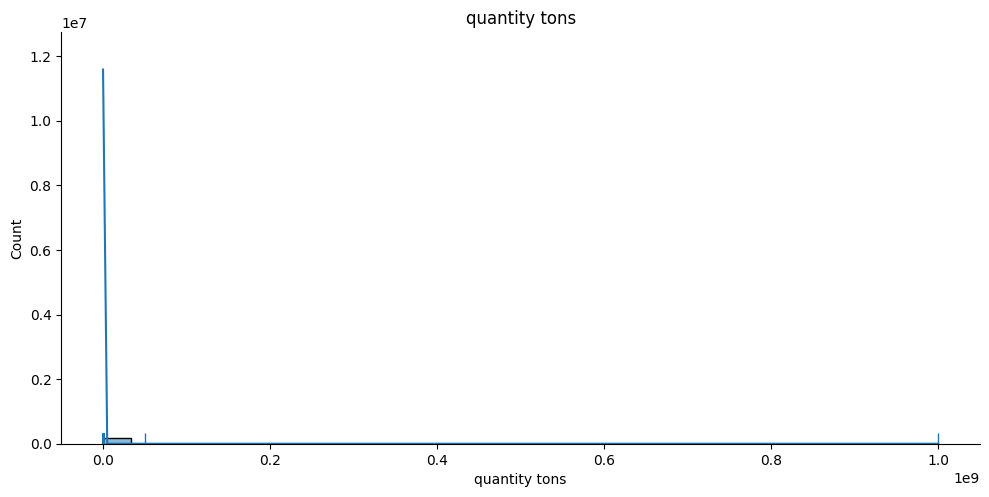

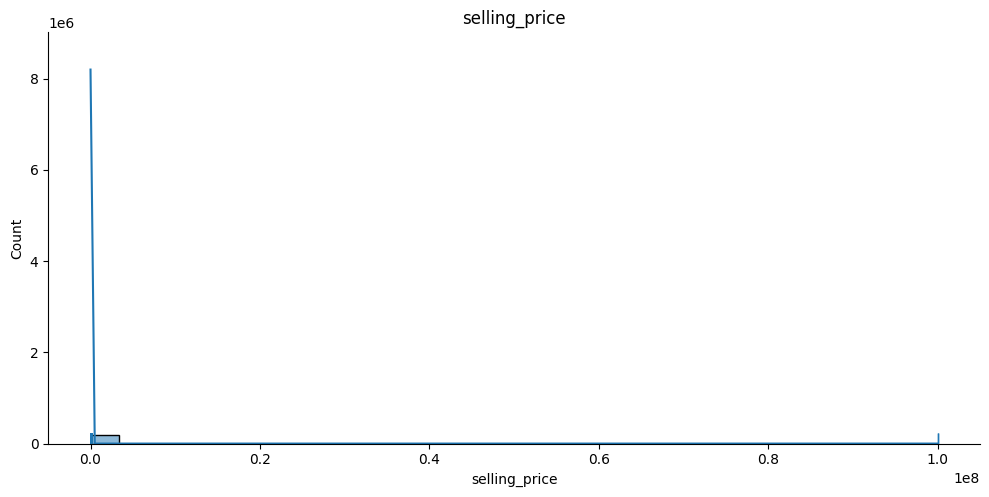

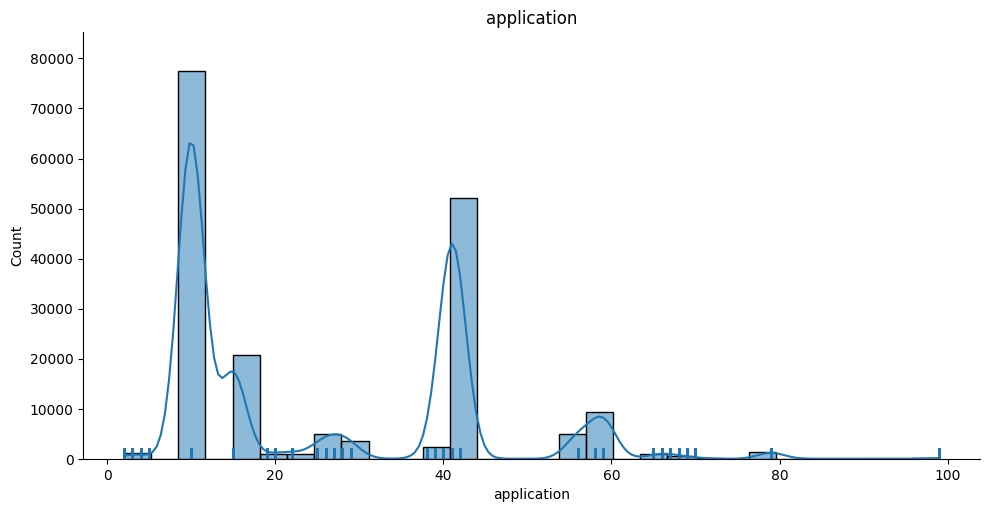

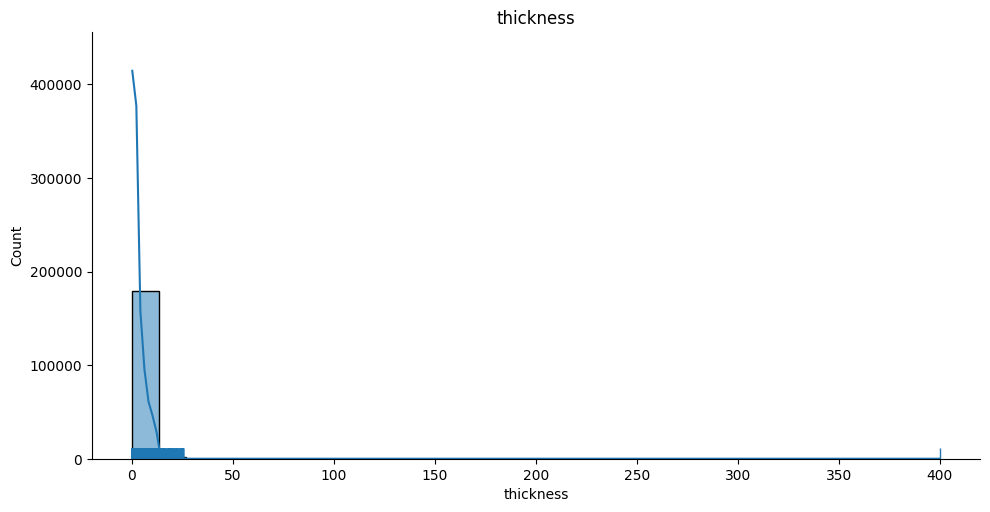

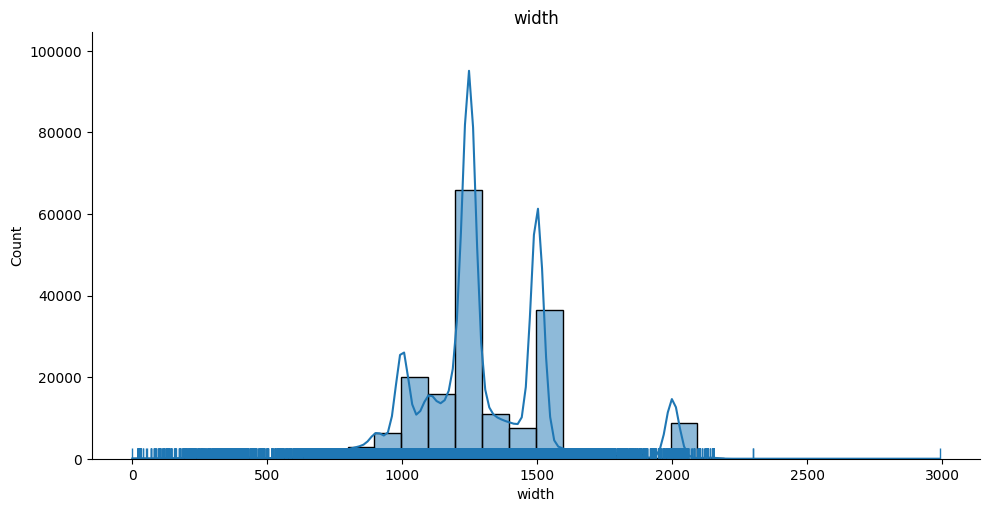

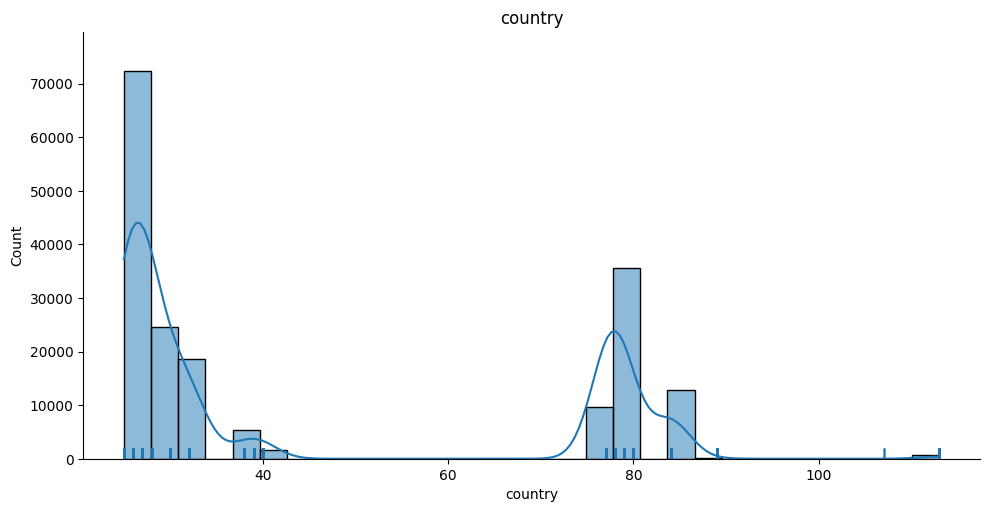

In [250]:
coloumns = ['quantity tons', 'selling_price', 'application', 'thickness', 'width', 'country']

for coloumn in coloumns:
    sns.displot(df[coloumn], height=5, aspect=2, bins=30, kde=True, rug=True)
    plt.title(coloumn)
    plt.show()

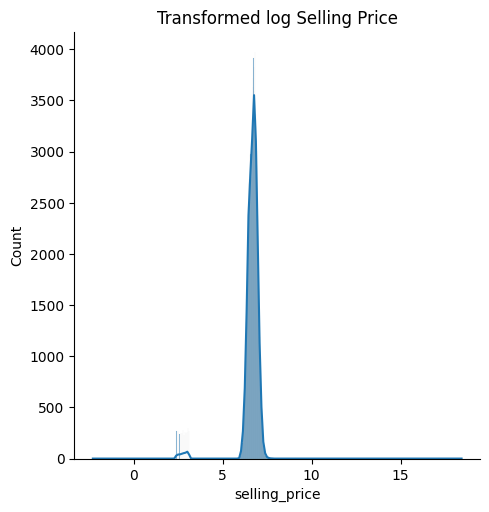

In [251]:
df.selling_price = np.log(df.selling_price)
sns.displot(df.selling_price, kde=True)
plt.title('Transformed log Selling Price')
plt.show()

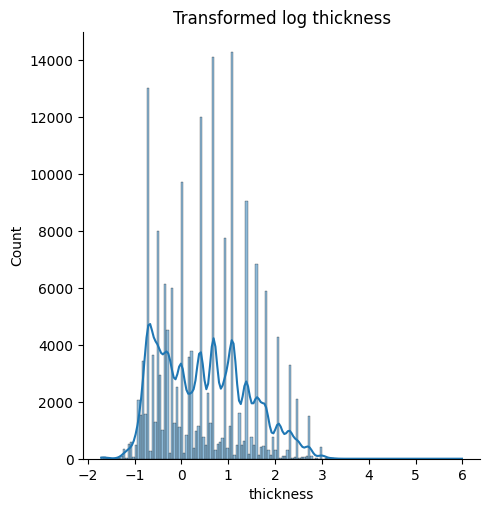

In [252]:
df.thickness = np.log(df.thickness)
sns.displot(df.thickness, kde=True)
plt.title('Transformed log thickness')
plt.show()

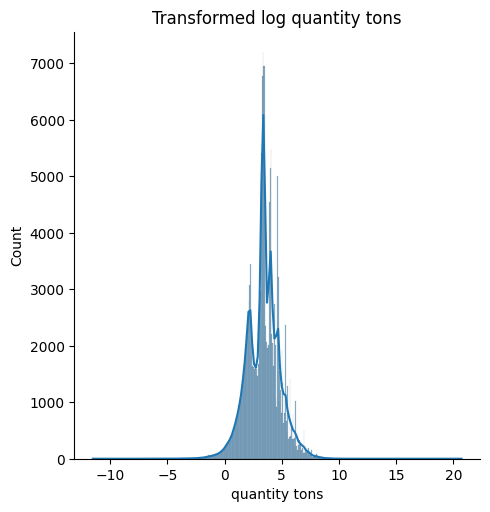

In [253]:
df['quantity tons'] = np.log(df['quantity tons'])
sns.displot(df['quantity tons'], kde=True)
plt.title('Transformed log quantity tons')
plt.show()

In [254]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181620 non-null  object 
 1   item_date      181620 non-null  object 
 2   quantity tons  181620 non-null  float64
 3   customer       181620 non-null  float64
 4   country        181620 non-null  float64
 5   status         181620 non-null  object 
 6   item type      181620 non-null  object 
 7   application    181620 non-null  float64
 8   thickness      181620 non-null  float64
 9   width          181620 non-null  float64
 10  material_ref   181620 non-null  object 
 11  product_ref    181620 non-null  int64  
 12  delivery date  181620 non-null  object 
 13  selling_price  181620 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


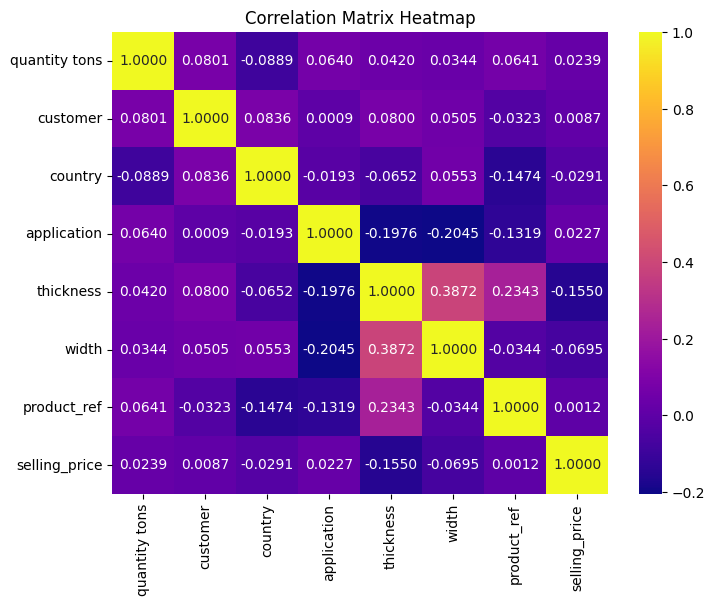

In [256]:
num_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", fmt=".4f")
plt.title("Correlation Matrix Heatmap")
plt.show()

DECESSION TREE REGRESSOR MODEL FOR PREDICTING SELLING PRICE

In [257]:
#Importing the required ML modules from sklearn liblrary
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [258]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [291]:
#Seperating the target variable
X=df[['quantity tons', 'customer', 'country','status', 'item type', 'application', 'thickness', 'width', 'product_ref']]
y=df['selling_price']

In [292]:
#Encoding the categorical variable
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
ohe_it=ohe.transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
ohe_s=ohe2.transform(X[['status']]).toarray()
X = np.concatenate((X[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, ohe_it, ohe_s), axis=1)

In [293]:
#Feature Scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [294]:
#Splitting data into training and testing using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [295]:
#Inializing Decision Tree  Regressor model
dtr=DecisionTreeRegressor()

In [296]:
#Defining Hyper parametres
param_grid={'max_depth': [2, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]}
#GridsearchCV
grid_search=GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parametres:", grid_search.best_params_)

Best Parametres: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [297]:
#Training the model with best hyper parametres
selling_price_model=grid_search.best_estimator_
y_pred=selling_price_model.predict(X_test)

In [299]:
#Evaluation Matrix
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.025516064935026537
R-squared: 0.9199672691070433


In [300]:
#SAVING THE MODEL
import pickle
with open('selling_price_prediction.pkl', 'wb') as file:
    pickle.dump(selling_price_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('encoder_it.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('encoder_s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

DECESSION TREE CLASSIFIER MODEL FOR PREDICTING STATUS

In [301]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

In [302]:
dfs = df[df['status'].isin(['Won', 'Lost'])]
len(dfs)

150427

In [303]:
dfs.status.value_counts()

status
Won     115996
Lost     34431
Name: count, dtype: int64

In [304]:
X=dfs[['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'product_ref', 'selling_price']]
Y = dfs['status']

In [305]:
#Encoding Categorical Variables
ohe_s = OneHotEncoder(handle_unknown='ignore')
ohe_s.fit(X[['item type']])
ohe_its=ohe_s.transform(X[['item type']]).toarray()
LB = LabelBinarizer()
LB.fit(Y)
y = LB.transform(Y)
X = np.concatenate((X[['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price']].values, ohe_its), axis=1)

In [306]:
#Feature Scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [308]:
#Inializing Decision Tree  Classifier model
dtr=DecisionTreeClassifier()

In [309]:
#Defining Hyper parametres
param_grid={'criterion': ['gini', 'entropy'],
            'max_depth': [2, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]}
#GridsearchCV
grid_search=GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parametres:", grid_search.best_params_)

Best Parametres: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [310]:
#Training the model with best hyper parametres
status_model=grid_search.best_estimator_
y_pred=status_model.predict(X_test)

In [311]:
#Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9142790666755302


In [312]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5409  1312]
 [ 1267 22098]]


In [313]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6721
           1       0.94      0.95      0.94     23365

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



In [314]:
#SAVING THE MODEL
with open('status_prediction.pkl', 'wb') as file:
    pickle.dump(status_model, file)
with open('status_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('s_encoder.pkl', 'wb') as f:
    pickle.dump(ohe_s, f)